Welcome back! In this lecture we will discuss prior models. I assume that you've worked through some foundational knowledge about Bayesian thinking. Now we will generalize some common Bayesian models, such as the Beta-Binomial, Normal-Normal, and Bayesian regression models, all of which are useful for broader data analytics and research purposes.

## Simulating a Beta Prior

Suppose you're running in an election for public office. A previous polling suggests that candidate A have the support of 40% of the voters. However, due to the fluctuation in support and polling errors, this figure is highly uncertain.

Let p be your underlying support, which is the proportion of vitors that plan to vote for your. Based on the information, your prior model of p is captured by a Beta distribution with shape parameter 45 and 55.

Syntax: scipy.stats.beta(a,b)

(array([0.03396986, 0.12455615, 0.26043559, 0.82659992, 1.857019  ,
        3.13655038, 4.86901323, 6.11457475, 7.59792529, 7.36013627,
        7.28087327, 6.31839391, 4.51799134, 2.97802437, 1.75510942,
        1.06438894, 0.39631503, 0.10190958, 0.01132329, 0.01132329]),
 array([0.28193162, 0.29959434, 0.31725706, 0.33491977, 0.35258249,
        0.3702452 , 0.38790792, 0.40557064, 0.42323335, 0.44089607,
        0.45855879, 0.4762215 , 0.49388422, 0.51154694, 0.52920965,
        0.54687237, 0.56453509, 0.5821978 , 0.59986052, 0.61752323,
        0.63518595]),
 <a list of 20 Patch objects>)

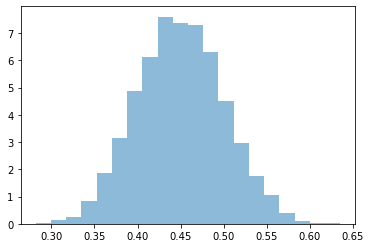

In [ ]:
import scipy.stats as stats
import numpy as np
# Now we will approximate the Beta(45, 55) prior using random samples from the 
beta_sample = stats.beta.rvs(45,55, size = 5000)
# Make a histogram
plt.hist(beta_sample, bins = 20, density=True, alpha=0.5)

(array([0.07498354, 0.4556692 , 1.71885342, 4.47017249, 7.33685085,
        7.636785  , 4.82778629, 1.88035643, 0.39222159, 0.04614372]),
 array([0.42511824, 0.45979252, 0.4944668 , 0.52914107, 0.56381535,
        0.59848963, 0.6331639 , 0.66783818, 0.70251246, 0.73718674,
        0.77186101]),
 <a list of 10 Patch objects>)

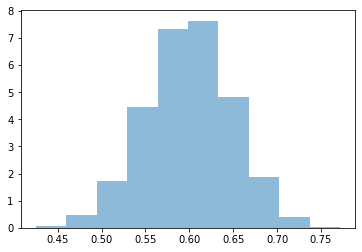

In [ ]:
#Another Beta Sample
beta_sample = stats.beta.rvs(60,40, size = 5000)
# Make a histogram
plt.hist(beta_sample, density=True, alpha=0.5)

https://www.youtube.com/watch?v=uial-2girHQ

Text(1.3, 0.03, '0.159')

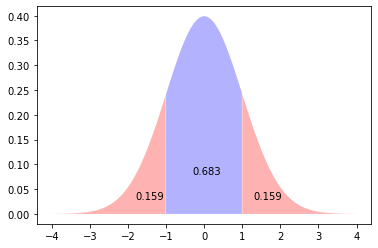

In [ ]:
import matplotlib.pyplot as plt
prob_under_neg1 = stats.norm.cdf(x = -1, loc = 0, scale = 1)
prob_over_1 = 1 - stats.norm.cdf(x = 1, loc = 0, scale = 1)
prob_between = 1 - prob_under_neg1 - prob_over_1

plt.fill_between(x = np.arange(-4, -1, 0.01),
                y1 = stats.norm.pdf(np.arange(-4, -1, 0.01)),
                facecolor = 'red',
                alpha = 0.3)
plt.fill_between(x = np.arange(-1, 1, 0.01),
                y1 = stats.norm.pdf(np.arange(-1, 1, 0.01)),
                facecolor = 'blue',
                alpha = 0.3)
plt.fill_between(x = np.arange(1, 4, 0.01),
                y1 = stats.norm.pdf(np.arange(1, 4, 0.01)),
                facecolor = 'red',
                alpha = 0.3)
plt.text(x = -1.8, y = 0.03, s = round(prob_under_neg1, 3))
plt.text(x = -0.3, y = 0.08, s = round(prob_between, 3))
plt.text(x = 1.3, y = 0.03, s = round(prob_over_1, 3))

In [ ]:
print(stats.norm.ppf(q = 0.005),
      stats.norm.ppf(q = 0.01),
     stats.norm.ppf(q = 0.025),
     stats.norm.ppf(q = 0.05),
      stats.norm.ppf(q = 0.1),
     stats.norm.ppf(q = 0.9),
     stats.norm.ppf(q = 0.95),
     stats.norm.ppf(q = 0.99),
     stats.norm.ppf(q = 0.995))

-2.575829303548901 -2.3263478740408408 -1.9599639845400545 -1.6448536269514729 -1.2815515655446004 1.2815515655446004 1.6448536269514722 2.3263478740408408 2.5758293035489004


The half-Cauchy has many properties; some are useful properties we may want in a prior.

A common choice for a prior on a scale parameter is the inverse gamma (not least, because it's conjugate for some familiar cases). When a weakly informative prior is desired, very small parameter values are used.

The half-Cauchy is quite heavy tailed and it, too, may be regarded as fairly weakly informative in some situations. Gelman ([1] for example) advocates for half-t priors (including the half-Cauchy) over the inverse gamma because they have better behavior for small parameter values but only regards it as wealy informative when a large scale parameter is used*. Gelman has focused more on the half-Cauchy in more recent years. The paper by Polson and Scott [2] gives additional reasons for choosing the half-Cauchy in particular.